# **PREDIKSI CUACA**

Dalam project ini kita akan melakukan prediksi cuaca dengan dataset **seattle-weather**.

Link **dataset**:
https://drive.google.com/file/d/1IIyYZEQReb4VavO_piu3qQeGK6VcwGJm/view?usp=sharing

## **Data Preprocessing**

1. Isi _code-cell_ dibawah dengan kode untuk:
    - **membaca dataset** _seattle-weather_
    - **menampilkan 15** baris data teratas



In [103]:
# import libraries yang dibutuhkan
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
import squarify

In [104]:
# membaca dataset bertipe CSV bernama "seattle-water"
df = pd.read_csv("seattle-weather.csv")
df

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


In [105]:
# Menampilkan 15 data teratas
df.head(15)

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
5,2012-01-06,2.5,4.4,2.2,2.2,rain
6,2012-01-07,0.0,7.2,2.8,2.3,rain
7,2012-01-08,0.0,10.0,2.8,2.0,sun
8,2012-01-09,4.3,9.4,5.0,3.4,rain
9,2012-01-10,1.0,6.1,0.6,3.4,rain


2. Munculkan **informasi** dataset dan lakukan **cleaning data** yang dibutuhkan:
    - mengecek dan menghapus **nilai kosong**
    - menghapus (**_drop_**) kolom _"date"_
    - mengecek dan menghapus data yang memiliki **nilai duplikat**

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


In [107]:
# cek apakah ada nilai kosong atau "NaN"
df.isnull().values.any()

False

In [108]:
df.isna().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [109]:
# Lihat lokasi pada kolom yang kosong atau NaN
df.loc[:, df.isnull().any()].columns

Index([], dtype='object')

In [110]:
# Menghapus kolom "date"
df.drop('date',axis=1,inplace=True)


In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   precipitation  1461 non-null   float64
 1   temp_max       1461 non-null   float64
 2   temp_min       1461 non-null   float64
 3   wind           1461 non-null   float64
 4   weather        1461 non-null   object 
dtypes: float64(4), object(1)
memory usage: 57.2+ KB


In [112]:
# lihat ukuran
df.shape

(1461, 5)

In [113]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1456    False
1457    False
1458    False
1459    False
1460    False
Length: 1461, dtype: bool

In [114]:
df[df.duplicated()].index

Index([188, 629, 748, 751, 863, 959, 1019, 1346], dtype='int64')

In [115]:
df[df.duplicated()].columns

Index(['precipitation', 'temp_max', 'temp_min', 'wind', 'weather'], dtype='object')

In [116]:
# menghapus data duplikat dan lihat kembali setelah proses hapus data duplikat
df = df.drop_duplicates()
df.shape

(1453, 5)

## **Visualisasi**

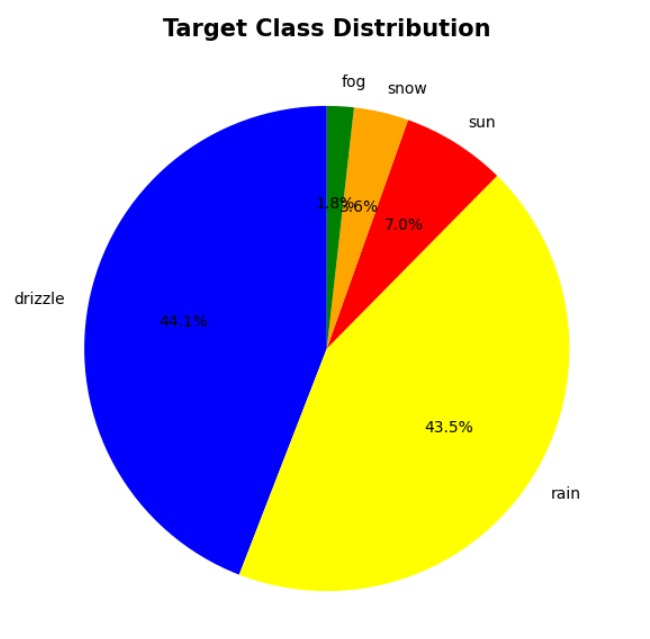

3. Diatas adalah contoh visualisasi menggunakan _diagram pie_,

    buatlah **visualisasi distribusi _target-class_** seperti diatas!

In [117]:
print(f"Target class list: {df['weather'].unique()}")

Target class list: ['drizzle' 'rain' 'sun' 'snow' 'fog']


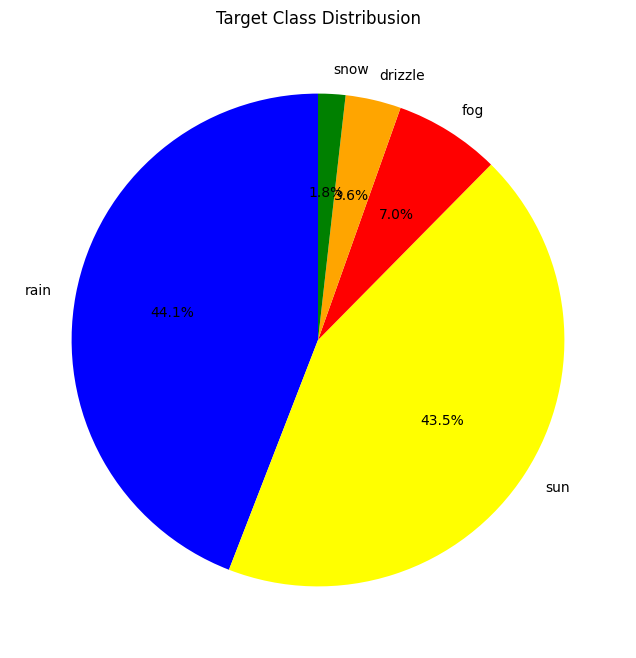

In [118]:
# Pie Chart untuk proporsi kategori target
target_counts = df['weather'].value_counts()
labels = [f'{i}' for i in target_counts.index]
colors = ['blue','yellow','red','orange','green']

plt.figure(figsize=(8, 8))
plt.pie(target_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Target Class Distribusion')
plt.show()

In [119]:
print(df['weather'].value_counts())

weather
rain       641
sun        632
fog        101
drizzle     53
snow        26
Name: count, dtype: int64


4. Anda akan melakukan **visualisasi relasi antar fitur** menggunakan _diagram scatter_.

    Perbaiki kata **'fix_me'** pada _code-cell_ dibawah!

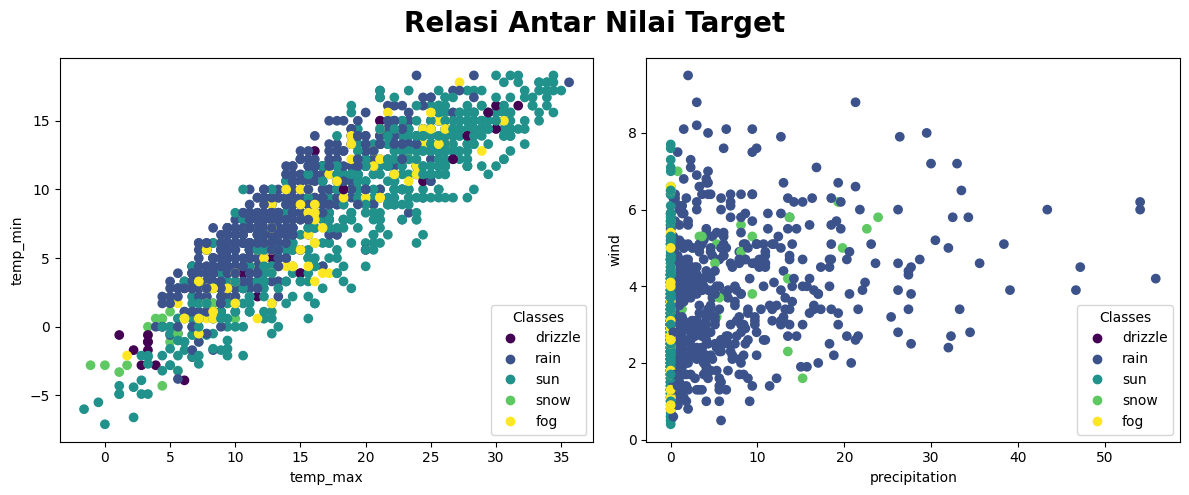

In [120]:
target_names= df['weather'].unique()

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

target = df['weather'].replace({
  'drizzle': 0,
  'rain': 1,
  'sun': 2,
  'snow': 3,
  'fog': 4
})

# Visualisasi relasi fitur temp_max dan temp_min
a_scatter =axs[0].scatter(df['temp_max'], df['temp_min'], c=target)
axs[0].set(xlabel="temp_max", ylabel="temp_min")
axs[0].legend(a_scatter.legend_elements()[0], target_names, loc="lower right", title="Classes")

# Visualisasi relasi fitur precipitation dan wind
b_scatter = axs[1].scatter(df['precipitation'], df['wind'], c=target)
axs[1].set(xlabel="precipitation", ylabel="wind")
axs[1].legend(b_scatter.legend_elements()[0], target_names, loc="lower right", title="Classes")

fig = fig.suptitle("Relasi Antar Nilai Target", fontsize=20, fontweight="bold")
plt.tight_layout()

<Axes: xlabel='temp_min', ylabel='Count'>

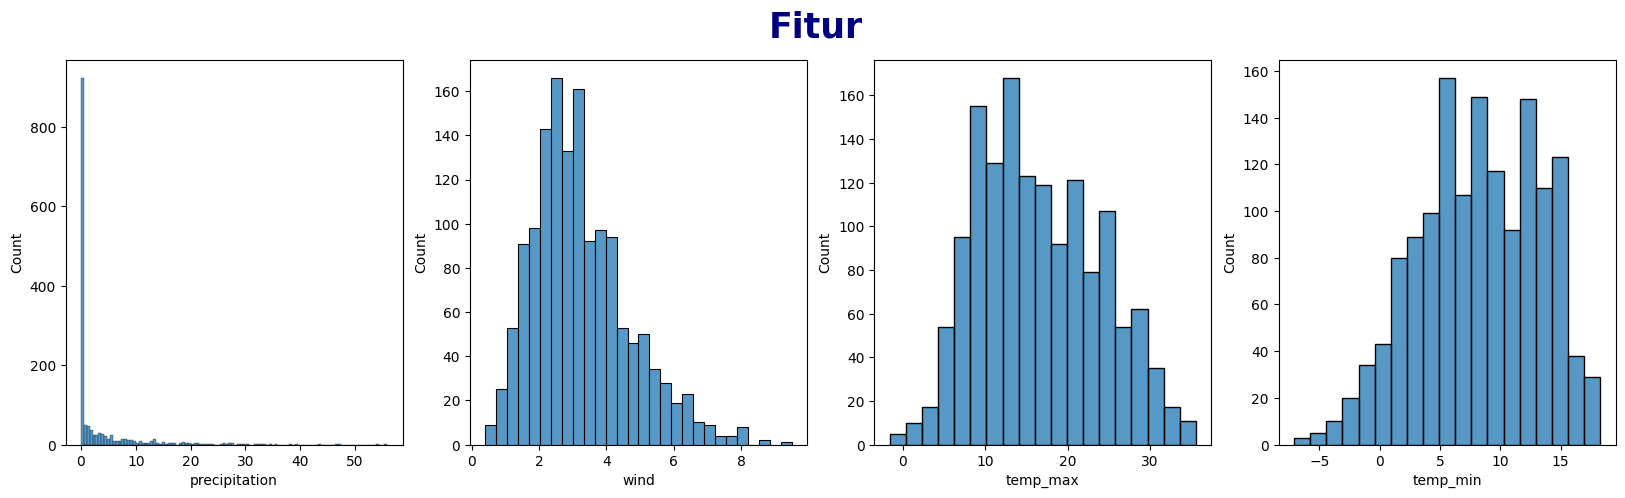

In [121]:
fig, axes = plt.subplots(1, 4, figsize=(20, 5))
plt.suptitle('Fitur', fontsize=25, fontweight='bold', color='navy')

# axis 1
sns.histplot(data=df, x='precipitation', ax=axes[0])

# axis 2
sns.histplot(data=df, x='wind', ax=axes[1])

# axis 3
sns.histplot(data=df, x='temp_max', ax=axes[2])

# axis 4
sns.histplot(data=df, x='temp_min', ax=axes[3])

## **Modelling**

5. **Bagi dataset** menjadi _train-set_ dan _test-set_ dengan ketentuan sebagai berikut:

    a. X = seluruh kolom fitur kecuali kolom target

    b. y = kolom target
    
    c. Bagi dengan rasio 70% _train-set_ dan 30% _test-set_

In [122]:
# spliting data into Data train and test
from sklearn.model_selection import train_test_split

x = df.iloc[:, :-1]
y = df['weather']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3 , random_state = 42)

6. **Perbaiki kata 'fix_me'** pada _code-cell_ dibawah untuk **menampilkan visualisasi rasio _target-class_** pada _train-set_ dan _test-set_!

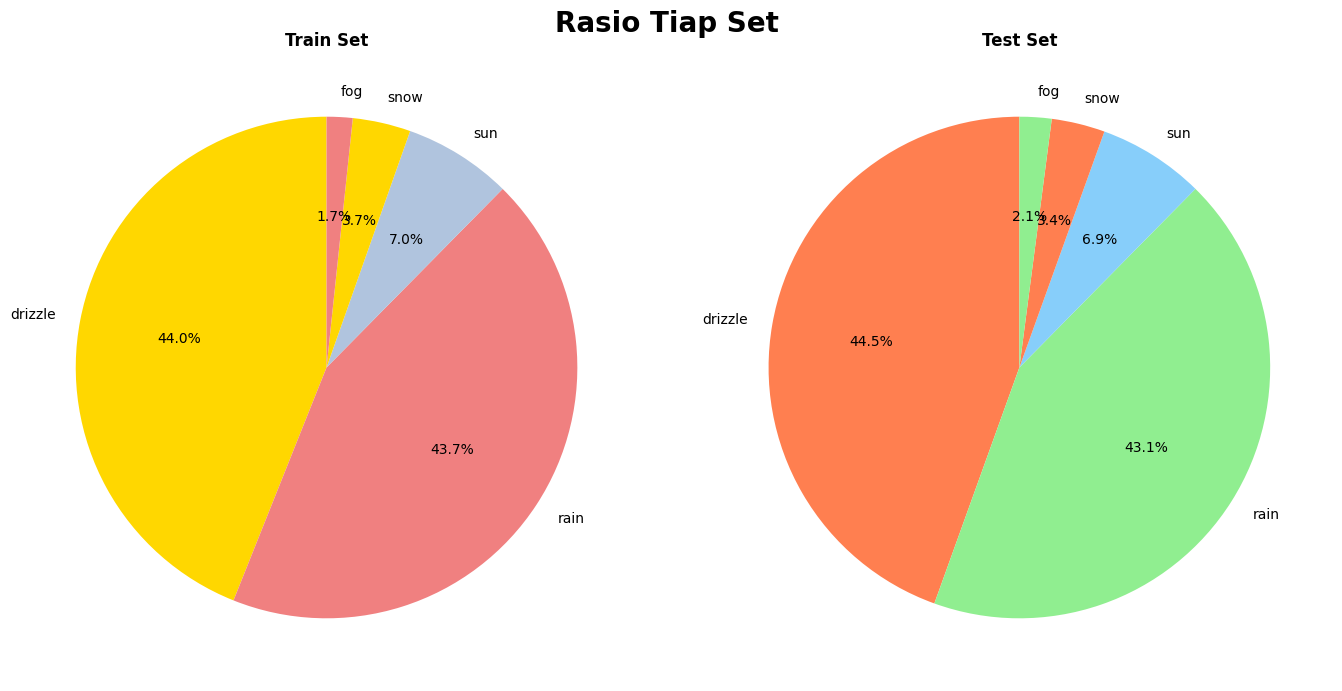

In [123]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(14, 7))
target_names = df['weather'].unique()
colors1 = ['gold', 'lightcoral', 'lightsteelblue']
colors2 = ['coral', 'lightgreen', 'lightskyblue']

#Train dataset
axs[0].pie(y_train.value_counts(), labels=target_names, colors=colors1, autopct='%1.1f%%', startangle=90)
axs[0].set_title("Train Set", fontweight="bold")

#Test dataset
axs[1].pie(y_test.value_counts(), labels=target_names, colors=colors2, autopct='%1.1f%%', startangle=90)
axs[1].set_title("Test Set", fontweight="bold")

fig = fig.suptitle("Rasio Tiap Set", fontsize=20, fontweight="bold")
plt.tight_layout()

7.  Buatlah model dengan salah satu algoritma klasifikasi lalu latih dan prediksi dataset!

In [124]:
# melakukan Modeling. Disini kita menggunakan Algoritma Desicion Tree Classifier

from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train, y_train)

DecisionTreeClassifier()

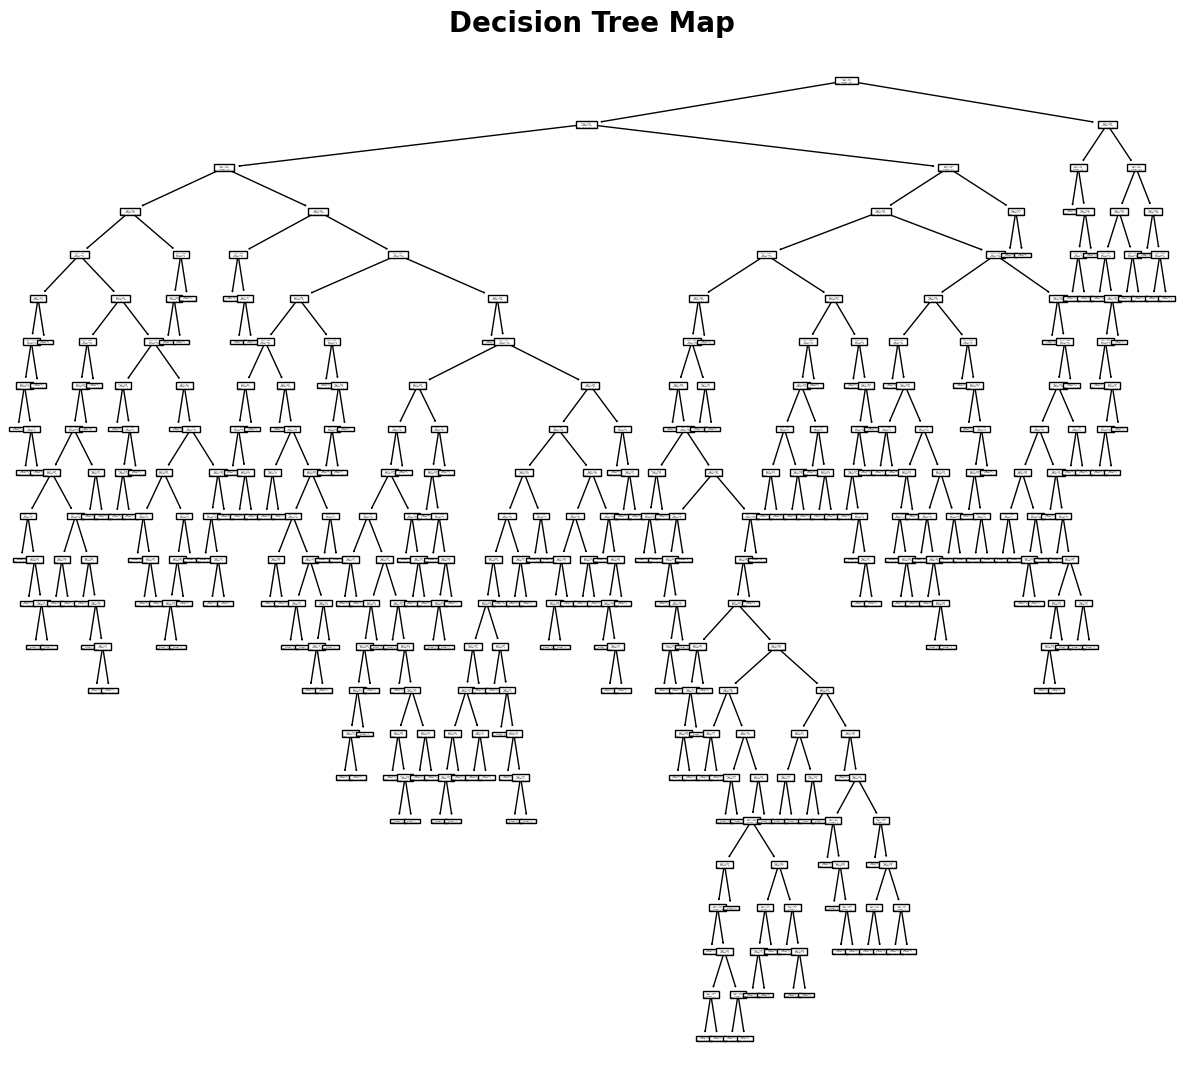

In [125]:
import sklearn.tree as tree
plt.figure(figsize=(15, 13))
tree.plot_tree(decision_tree)
plt.title("Decision Tree Map", fontsize = 20, fontweight = "bold", pad = 20)
plt.show()

## **Evaluasi**

8. Munculkan akurasi yang dihasilkan dari model yang anda gunakan.

In [126]:
from sklearn.metrics import accuracy_score

y_pred = decision_tree.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)

print("Akurasi Model : {:.1f}%".format(accuracy * 100))
print("Accuracy:", accuracy)

Akurasi Model : 75.5%
Accuracy: 0.7545871559633027


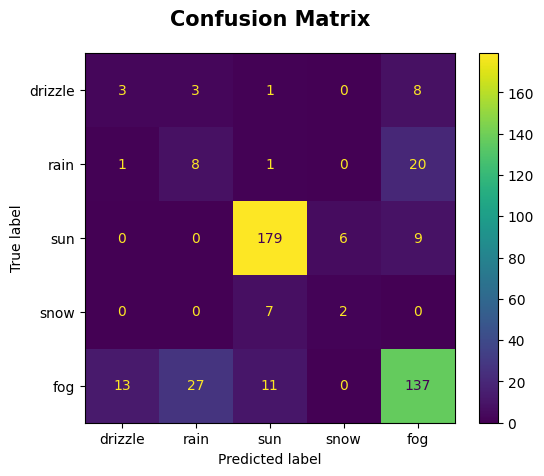

In [127]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cf_matrix = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cf_matrix, display_labels=target_names)

cm_display.plot()
plt.title("Confusion Matrix", fontsize=15, fontweight="bold", pad=20)
plt.show()

In [128]:
from sklearn.metrics import confusion_matrix, classification_report

# Calculate confusion matrix
dt_model_cnf_matrix = confusion_matrix(y_test, y_pred) 
print("Confusion Matrix:")
print(dt_model_cnf_matrix)

# Generate classification report
dt_model_csf_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(dt_model_csf_report)

Confusion Matrix:
[[  3   3   1   0   8]
 [  1   8   1   0  20]
 [  0   0 179   6   9]
 [  0   0   7   2   0]
 [ 13  27  11   0 137]]
Classification Report:
              precision    recall  f1-score   support

     drizzle       0.18      0.20      0.19        15
         fog       0.21      0.27      0.24        30
        rain       0.90      0.92      0.91       194
        snow       0.25      0.22      0.24         9
         sun       0.79      0.73      0.76       188

    accuracy                           0.75       436
   macro avg       0.46      0.47      0.47       436
weighted avg       0.77      0.75      0.76       436



## **Esai**

9. Berikan kesimpulan dari project yang telah anda buat.

_Tulis **jawaban** no. 9 disini_

Pada kasus ini klasifikasi menggunakan algoritma Decision Tree pada dataset "seattle-weather" menghasilkan akurasi yang kurang maksimal dikarenakan dataset "seattle-weather" memiliki nilai target yang tidak seimbang cukup signifikan dan juga pada relasi antar fiturnya memiliki data-data yang rentang nilainya cukup tinggi atau jauh. namun akurasi ini cukup baik jika dikaitkan dengan konteks datanya yaitu pada prediksi cuaca yang tingkat kefatalanya tidak cukup beresiko.

10. Upload dan lampirkan link
    - **Video** penjelasan berdurasi 10-15 menit mengenai project anda.
    - **Repository Github** berisi file notebook (_.ipynb_) anda.

In [129]:
link_video = "https://drive.google.com/file/d/1ZfocVXpxYgQPNcA-cBykhApsUt9w-es_/view?usp=sharing"
link_github = ""